# Ch5 SVM

In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## 1 Linear SVM Classification

### Large margin classification

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, [2, 3]]  # petal length, petal width
y = iris["target"]

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Binary classification
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svc模型

In [5]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# Weights assigned to the features. Coefficients in the primal problem
# This is only available in the case of a linear kernel
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [7]:
# Coefficients of the support vector in the decision function.
svm_clf.dual_coef_

array([[-1.1764704,  1.1764704]])

In [8]:
# Indices of support vectors.
svm_clf.support_

array([44, 98])

In [9]:
print(y[44], y[98])

0 1


In [10]:
# Number of support vectors for each class
svm_clf.n_support_

array([1, 1])

In [11]:
# Support vectors
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

In [12]:
# Constants in decision function
svm_clf.intercept_

array([-3.78823471])

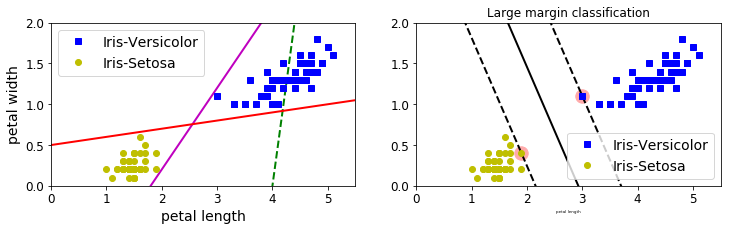

In [13]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    intercept = svm_clf.intercept_[0]  # array to value

    # At the decision boundary decision, w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1*x0 - b/w1
    # The reason why we do this is that we will plot the result.
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - intercept / w[1]

    # w0*x0 + w1*x1 + b = 1, positive instances
    # x1 = -w0/w1*x0 - b/w1 - 1/w1
    margin = 1 / w[1]  # This is for two dimensions.
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    support_vectors = svm_clf.support_vectors_
    plt.scatter(support_vectors[:, 0],
                support_vectors[:, 1], s=180, facecolors="#FFAAAA")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
plt.legend(loc="best", fontsize=14)
plt.xlabel("petal length", fontsize=4)
plt.axis([0, 5.5, 0, 2])

plt.title("Large margin classification")
plt.show()

### Sensitivity to feature scales

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

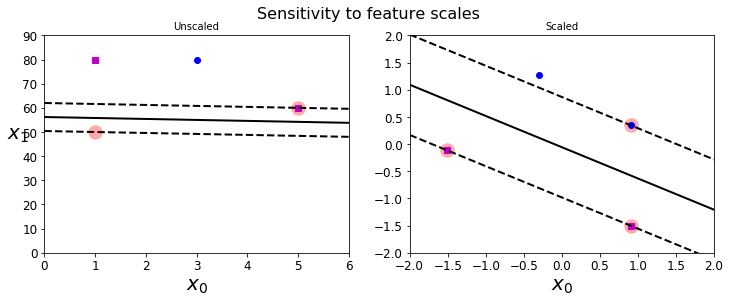

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==1], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=10)
plt.axis([0, 6, 0, 90])

X_scaled = std_scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=10)
plt.axis([-2, 2, -2, 2])

plt.suptitle("Sensitivity to feature scales", fontsize=16)
plt.show()

### Sensitivity to outliers

outliers:

In [16]:
# Add outliers
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

In [17]:
svm_clf_2 = SVC(kernel="linear", C=10**9)
svm_clf_2.fit(Xo2, yo2)

SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Number of support vectors for each class
svm_clf_2.n_support_

array([1, 2])

In [19]:
# Support Vectors
svm_clf_2.support_vectors_

array([[3.2, 0.8],
       [3.3, 1. ],
       [3. , 1.1]])

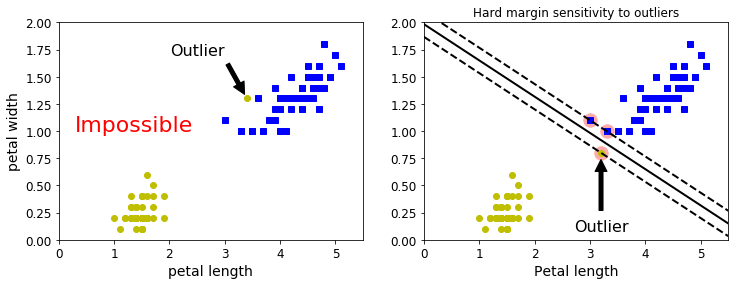

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible", fontsize=22, color="red")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7), ha="center",
             arrowprops=dict(facecolor="black", shrink=0.1), fontsize=16)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[: ,0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf_2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.title("Hard margin sensitivity to outliers")
plt.show()

### Large margin v.s. margin violations

In [21]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 2).astype(np.float64)

svm_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [22]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Generate the graph comparing different regularization settings:

In [23]:
std_scaler = StandardScaler()
svm_clf_1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf_2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf_1 = Pipeline([("std_scaler", std_scaler),
                             ("linear_svc", svm_clf_1)])
scaled_svm_clf_2 = Pipeline([("std_scaler", std_scaler),
                             ("linear_svc", svm_clf_2)])
scaled_svm_clf_1.fit(X, y)
scaled_svm_clf_2.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [24]:
std_scaler.scale_

array([1.75852918, 0.76061262])

In [25]:
std_scaler.mean_

array([3.75866667, 1.19866667])

In [26]:
std_scaler.mean_ / std_scaler.scale_

array([2.13739226, 1.57592267])

In [27]:
y * 2 - 1

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
# Convert to unscaled parameters
# In the binary case, confidence score for self.classes_[1]
# where >0 means this class would be predicted.
b1 = svm_clf_1.decision_function([-std_scaler.mean_ / std_scaler.scale_])  # -9.768
b2 = svm_clf_2.decision_function([-std_scaler.mean_ / std_scaler.scale_])  # -32.555
w1 = svm_clf_1.coef_[0] / std_scaler.scale_
w2 = svm_clf_2.coef_[0] / std_scaler.scale_
svm_clf_1.intercept_ = np.array([b1])
svm_clf_2.intercept_ = np.array([b2])
svm_clf_1.coef_ = np.array([w1])
svm_clf_2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx_1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx_2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf_1.support_vectors_ = X[support_vectors_idx_1]
svm_clf_2.support_vectors_ = X[support_vectors_idx_2]

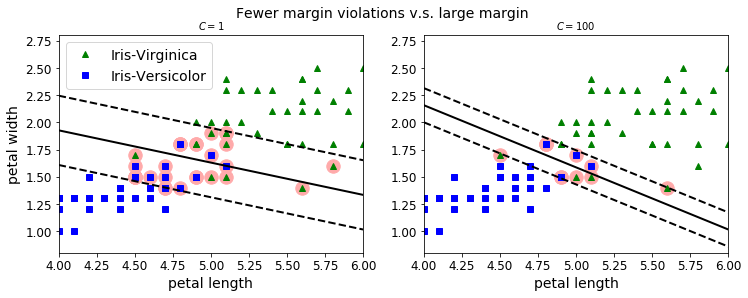

In [29]:
# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf_1, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C={}$".format(svm_clf_1.C), fontsize=10)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf_2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf_2.C), fontsize=10)
plt.axis([4, 6, 0.8, 2.8])

plt.suptitle("Fewer margin violations v.s. large margin", fontsize=14)
plt.show()

## 2 NonLinear SVM classification

Although lienar SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. 

**One approach to handling nonlinear datasets is to add more features, such as polynomial features.**

### Use polynomial features to handle nonlinear datasets

In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [31]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
print("shape of X:\t", X.shape)
print("\ny:\t", y)

shape of X:	 (100, 2)

y:	 [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [32]:
pd.DataFrame(X).describe()

,0,1
count,100.000000,100.000000
mean,0.507184,0.244047
std,0.905111,0.507207
min,-1.272016,-0.649143
25%,-0.056200,-0.167451
50%,0.432910,0.252951
75%,1.157670,0.722873
max,2.409381,1.271114


In [33]:
def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    # plt.grid(True, which="major")  # default
    # plt.grid(True, which="minor")
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

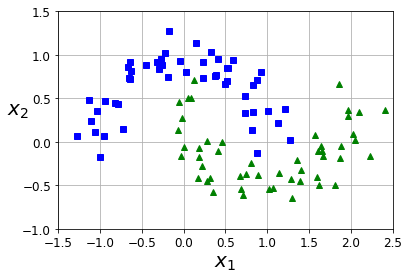

In [34]:
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [35]:
polynomial_svm_clf = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=3)),
    ("std_scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', random_state=42))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [36]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=.1)

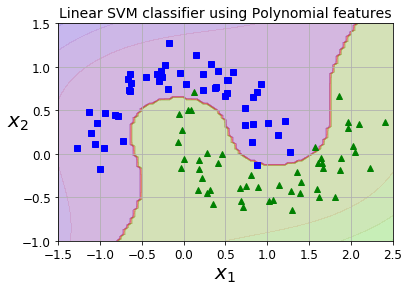

In [37]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])

plt.title("Linear SVM classifier using Polynomial features", fontsize=14)
plt.show()

### Polynomial Kernel

**Adding polynomial features** is **simple to implement** and can **work great well with all sorts of ML algorithms** (not just SVMs), but at a **low polynomial degree** it cannot deal with very complex datasets, and with a **high polynomial degree** it creates a huge number of features, making the model too slow.

In [38]:
poly_kernel_svm_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [39]:
poly100_kernel_svm_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

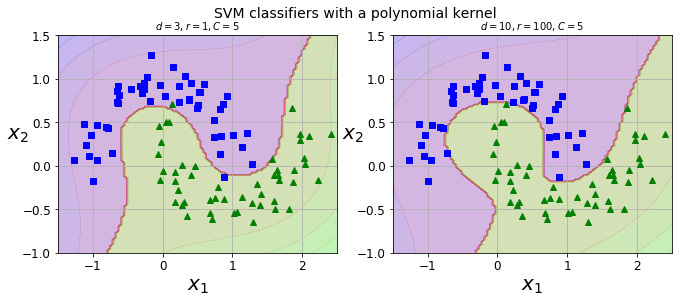

In [40]:
# plot the results
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=10)

plt.subplot(122)
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=10)

plt.suptitle("SVM classifiers with a polynomial kernel", fontsize=14)
plt.show()

### Gaussian RBF kernel

Another technique to tackle nonlinear problems is to add features computed using a **similarity function** that measures how much each instance resembles (像，类似) a particular **landmark**.

The kernel trick does its SVC magic: it makes it possible to obtain a similar result as y had added many similarity features, without actually having to add them.

In [41]:
rbf_kernel_svm_clf = Pipeline([
    ("std_scaler", std_scaler),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [42]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
hyperparams

((0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000))

In [43]:
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("std_scaler", std_scaler),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

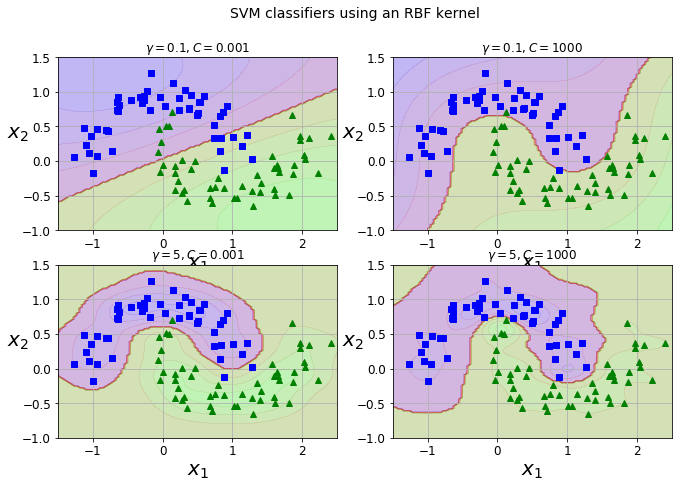

In [44]:
plt.figure(figsize=(11, 7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=12)

plt.suptitle("SVM classifiers using an RBF kernel", fontsize=14)
plt.show()

## 3 SVM Regression

### Linear Regression

Generate some random linear data:

In [45]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [46]:
print("shape of X:\t", X.shape)
X[:5]

shape of X:	 (50, 1)


array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [47]:
print("shape of y:\t", y.shape)
y

shape of y:	 (50,)


array([ 6.98570729,  9.87565412,  8.27631537,  7.29084721,  3.45758985,
        4.21612291,  3.8878629 , 10.2541791 ,  7.95030836,  6.48539531,
        4.44759094,  9.43437683,  8.31773384,  5.88571095,  6.12194933,
        6.03170718,  4.98623593,  6.83932621,  6.92293354,  6.72291997,
        7.19194313,  4.65130419,  4.64653292,  5.00196444,  7.54894573,
       10.0672958 ,  5.12603257,  8.08893953,  7.91612344,  3.63358272,
        8.00666472,  6.56118131,  4.35448352, 11.25795688,  7.17404709,
        9.67228659,  5.91472968,  4.28702533,  8.19715894,  4.65334605,
        4.51255752,  7.32817403,  5.68422517,  8.93765219,  4.74418629,
        7.47337666,  6.78566857,  7.44915924,  6.75050147,  5.62239417])

In [48]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [49]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [50]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

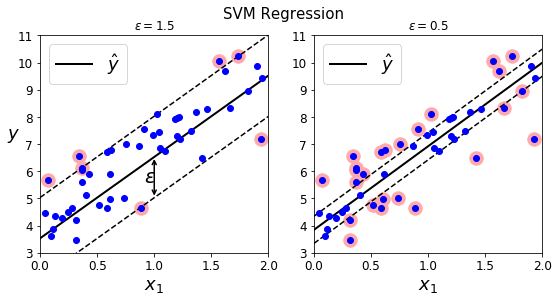

In [51]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=12)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=12)

plt.suptitle("SVM Regression", fontsize=15)
plt.show()

### Nonlinear Regression

In [52]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [53]:
print("shape of X:\t", X.shape)
X[:5]

shape of X:	 (100, 1)


array([[-0.25091976],
       [ 0.90142861],
       [ 0.46398788],
       [ 0.19731697],
       [-0.68796272]])

In [54]:
print("shape of y:\t", y.shape)
y

shape of y:	 (100,)


array([0.21509309, 0.6665289 , 0.36321724, 0.0404418 , 0.34588289,
       0.4035897 , 0.64998631, 0.48957815, 0.15982213, 0.27802721,
       0.65533556, 0.76848762, 0.43454873, 0.35929214, 0.34854345,
       0.43401081, 0.16728534, 0.17341083, 0.15644115, 0.09906488,
       0.27700475, 0.41393365, 0.24534797, 0.18553197, 0.05353662,
       0.37762132, 0.28605498, 0.1230244 , 0.21943525, 0.56110962,
       0.43325935, 0.36867131, 0.51712559, 0.68532897, 0.53487567,
       0.44924593, 0.24329733, 0.68959409, 0.28549412, 0.22534868,
       0.40664666, 0.0822141 , 0.65474808, 0.69214377, 0.34723339,
       0.1943927 , 0.37352708, 0.06463395, 0.27239147, 0.55464988,
       0.63588274, 0.34979293, 0.68418356, 0.54039518, 0.08368246,
       0.64718688, 0.35014497, 0.37140866, 0.43073947, 0.38107849,
       0.12419562, 0.22662619, 0.56323592, 0.08930345, 0.27491227,
       0.3428994 , 0.22530735, 0.46154881, 0.50291272, 0.84967745,
       0.27898831, 0.18924196, 0.64231533, 0.49182258, 0.35200

In [55]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
# Indics of support vectors
svm_poly_reg.support_

array([ 3, 19, 24, 30, 34, 37, 43, 46, 47, 48, 49, 54, 56, 58, 59, 62, 63,
       65, 66, 69, 71, 79, 80, 81, 82, 84, 86, 88, 91, 98])

In [57]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

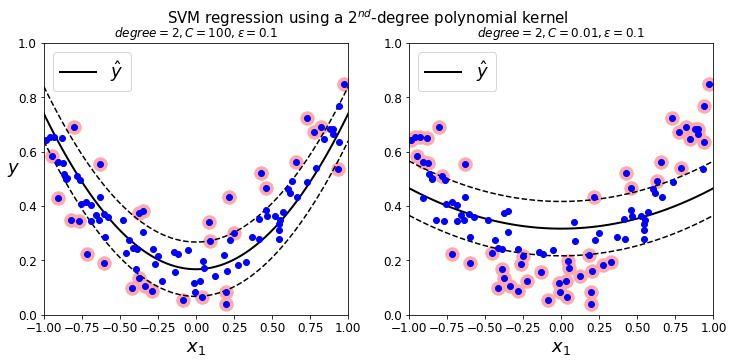

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(
    svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=12)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(
    svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=12)

plt.suptitle(
    r"SVM regression using a $2^{nd}$-degree polynomial kernel", fontsize=15)
plt.show()